In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("...\\Assignment - 1DS.xlsx")

In [3]:
df.tail(5)

Prod ID  Category    Brand                      Date  Price  MRP  \
73221  B08KJ1LC  PRINTERS  Brother  Wednesday, June 16, 2021    NaN  NaN   
73222  B08KJ49P  PRINTERS       HP  Wednesday, June 16, 2021    NaN  NaN   
73223  B08KJ1LC  PRINTERS  Brother    Tuesday, June 15, 2021    NaN  NaN   
73224  B00B2L2Y  PRINTERS    Canon    Tuesday, June 15, 2021    NaN  NaN   
73225  B08KJ49P  PRINTERS       HP    Tuesday, June 15, 2021    NaN  NaN   

       Units Sold  
73221         NaN  
73222         NaN  
73223         NaN  
73224         NaN  
73225         NaN

In [4]:
print(df.dtypes)

Prod ID        object
Category       object
Brand          object
Date           object
Price         float64
MRP           float64
Units Sold    float64
dtype: object


In [5]:
df.shape

(73226, 7)

In [6]:
df.describe()

Price            MRP    Units Sold
count   60953.000000   41208.000000  72572.000000
mean    13025.577035   19893.585056      4.219534
std     13309.001263   18041.809141     17.310772
min         0.000000    1756.000000      0.000000
25%      6117.000000    9888.000000      0.000000
50%      9445.000000   14400.000000      0.000000
75%     15164.000000   23716.000000      0.000000
max    185708.000000  300000.000000    220.000000

In [7]:
df.isna().sum()

Prod ID           0
Category          0
Brand             0
Date              0
Price         12273
MRP           32018
Units Sold      654
dtype: int64

In [8]:
df.head(5)

Prod ID  Category Brand                     Date    Price      MRP  \
0  B08YZ28L  PRINTERS    HP  Saturday, June 12, 2021  19962.0  26112.0   
1  B08YR1SS  PRINTERS    HP  Saturday, June 12, 2021  13803.0  19099.0   
2  B08YZ28L  PRINTERS    HP    Friday, June 11, 2021  22195.0  26112.0   
3  B08YR1SS  PRINTERS    HP    Friday, June 11, 2021  14122.0  19099.0   
4  B089T6X8  DESKTOPS    HP    Friday, June 11, 2021  31953.0  54426.0   

   Units Sold  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         2.0

In [9]:
# Category wise Null values count
category = df['Category'].unique()
for cat in category:
    filtered_df = df[df['Category'] == cat]
    null_counts = filtered_df[['Price', 'MRP', 'Units Sold']].isna().sum()
    print(f"{cat}")
    print(f"Price: {null_counts['Price']}, MRP: {null_counts['MRP']}, Units Sold: {null_counts['Units Sold']}")


PRINTERS
Price: 627, MRP: 11793, Units Sold: 14
DESKTOPS
Price: 11646, MRP: 11646, Units Sold: 640
MONITORS
Price: 0, MRP: 8579, Units Sold: 0


In [10]:
df['Category'].value_counts()

Category
PRINTERS    35496
MONITORS    23331
DESKTOPS    14399
Name: count, dtype: int64

In [11]:
# Null value percentage
category = df['Category'].unique()
for cat in category:
    filtered_df = df[df['Category'] == cat]
    null = filtered_df[['Price', 'MRP', 'Units Sold']].isna().sum()
    total = len(filtered_df)
    percent_price = (null['Price'] / total) * 100
    percent_mrp = (null['MRP'] / total) * 100
    percent_units = (null['Units Sold'] / total) * 100
    print(f"{cat}")
    print(f"Price: {percent_price:.2f}%, MRP: {percent_mrp:.2f}%, Units Sold: {percent_units:.2f}%")


PRINTERS
Price: 1.77%, MRP: 33.22%, Units Sold: 0.04%
DESKTOPS
Price: 80.88%, MRP: 80.88%, Units Sold: 4.44%
MONITORS
Price: 0.00%, MRP: 36.77%, Units Sold: 0.00%


In [12]:
#Brand Null value percentage
desktop_brands = df[df['Category'] == 'DESKTOPS']['Brand'].unique()
brand_null_percentages = []

for brand in desktop_brands:
    brand_df = df[(df['Category'] == 'DESKTOPS') & (df['Brand'] == brand)]
    null = brand_df[['Price', 'MRP', 'Units Sold']].isna().sum()
    total = len(brand_df)
    percent_price = (null['Price'] / total) * 100
    percent_mrp = (null['MRP'] / total) * 100
    percent_sold = (null['Units Sold'] / total) * 100
    brand_null_percentages.append({
        'Brand': brand,
        'Price_Null_Percentage': percent_price,
        'MRP_Null_Percentage': percent_mrp,
        'Units_Sold_Null_Percentage': percent_sold,
        'Total_Items': total
    })


brand_null_df = pd.DataFrame(brand_null_percentages)

In [13]:
brand_null_df

Brand  Price_Null_Percentage  MRP_Null_Percentage  \
0      HP              75.224775            75.224775   
1  Lenovo              78.461161            78.461161   
2    Dell              83.608284            83.608284   
3    Asus              87.012987            87.012987   
4   Apple              99.567100            99.567100   
5    Acer              88.961039            88.961039   

   Units_Sold_Null_Percentage  Total_Items  
0                    4.120879         4004  
1                    4.141142         4081  
2                    4.808705         2849  
3                    4.818865         2926  
4                    5.194805          231  
5                    5.194805          308

In [14]:
# Since Apple and Acer have less total items as compared to others, not considering those brands. Removing Asus as it is impossible to predict the unbiased missing values.
# Since HP and Lenovo have approx 25 percent values, using basic ML predicting the rest of the values. For prediction we are removing rows which have units sold has null values.

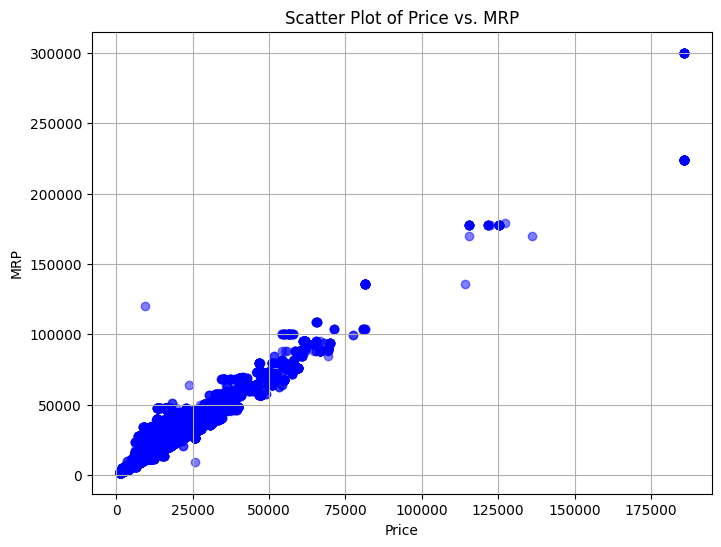

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Price'], df['MRP'], alpha=0.5, color='b')  # Plotting the scatter plot
plt.title('Scatter Plot of Price vs. MRP')
plt.xlabel('Price')
plt.ylabel('MRP')
plt.grid(True)
plt.show()


In [16]:
# Since there is a linear relationship between price and MRP, From a business perspective, it might be more meaningful to predict 'Price' first because it's the actual amount 
# at which the product is sold. Predicting 'MRP' from 'Price' then helps to estimate the maximum retail price set by the manufacturer. Also, there are less null values in price column.

In [17]:
df = df.drop(df[df['Brand'].isin(['Apple', 'Acer', 'Asus'])].index)


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


# Drop rows with null values in 'Units Sold'
df_cleaned = df.dropna(subset=['Units Sold'])

# Splitting the data into train and test sets for Price prediction
train_price = df_cleaned.dropna(subset=['Price'])
test_price = df_cleaned[df_cleaned['Price'].isnull()]

# Define features and target for Price prediction
features_price = ['Category', 'Brand', 'Units Sold']
target_price = 'Price'

# Convert categorical features using LabelEncoder for Price prediction
label_encoders_price = {}
for feature in ['Category', 'Brand']:
    label_encoders_price[feature] = LabelEncoder()
    train_price[feature] = label_encoders_price[feature].fit_transform(train_price[feature])
    test_price[feature] = label_encoders_price[feature].transform(test_price[feature])

# Splitting X and y for Price prediction
X_train_price = train_price[features_price]
y_train_price = train_price[target_price]
X_test_price = test_price[features_price]

# Create and fit the model for Price prediction
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Predicting Price
y_pred_price = model_price.predict(X_test_price)

# Add predicted Price values into the test set
test_price.loc[X_test_price.index, 'Predicted_Price'] = y_pred_price


# Splitting the data into train and test sets for MRP prediction
train_mrp = df_cleaned.dropna(subset=['MRP'])
test_mrp = df_cleaned[df_cleaned['MRP'].isnull()]

# Define features and target for MRP prediction
features_mrp = ['Category', 'Brand', 'Price', 'Units Sold']
target_mrp = 'MRP'

# Convert categorical features using LabelEncoder for MRP prediction
label_encoders_mrp = {}
for feature in ['Category', 'Brand']:
    label_encoders_mrp[feature] = LabelEncoder()
    train_mrp[feature] = label_encoders_mrp[feature].fit_transform(train_mrp[feature])
    test_mrp[feature] = label_encoders_mrp[feature].transform(test_mrp[feature])

# Splitting X and y for MRP prediction
X_train_mrp = train_mrp[features_mrp]
y_train_mrp = train_mrp[target_mrp]
X_test_mrp = test_mrp[features_mrp]

# Check if there are samples left in the test set for MRP prediction
if len(X_test_mrp) > 0:
    # Create and fit the model for MRP prediction
    model_mrp = LinearRegression()
    model_mrp.fit(X_train_mrp, y_train_mrp)

    # Predicting MRP
    y_pred_mrp = model_mrp.predict(X_test_mrp)

    # Add predicted MRP values into the test set
    test_mrp.loc[X_test_mrp.index, 'Predicted_MRP'] = y_pred_mrp



C:\Users\Anisha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Anisha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Anisha\AppData\Local\Temp\ipykernel_20636\1952647733.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [37]:
df_cleaned.head(5)

Prod ID  Category Brand                     Date    Price      MRP  \
0  B08YZ28L  PRINTERS    HP  Saturday, June 12, 2021  19962.0  26112.0   
1  B08YR1SS  PRINTERS    HP  Saturday, June 12, 2021  13803.0  19099.0   
2  B08YZ28L  PRINTERS    HP    Friday, June 11, 2021  22195.0  26112.0   
3  B08YR1SS  PRINTERS    HP    Friday, June 11, 2021  14122.0  19099.0   
4  B089T6X8  DESKTOPS    HP    Friday, June 11, 2021  31953.0  54426.0   

   Units Sold  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         2.0

In [20]:
df_cleaned['Price'].isna().sum()

0

In [21]:
df_cleaned['MRP'].isna().sum()

0

In [22]:
category = df_cleaned['Category'].unique()
for cat in category:
    filtered_df_cleaned = df_cleaned[df_cleaned['Category'] == cat]
    null_counts = filtered_df_cleaned[['Price', 'MRP', 'Units Sold']].isna().sum()
    total_rows = len(filtered_df_cleaned)
    percent_missing_price = (null_counts['Price'] / total_rows) * 100
    percent_missing_mrp = (null_counts['MRP'] / total_rows) * 100
    percent_missing_units_sold = (null_counts['Units Sold'] / total_rows) * 100
    print(f"{cat}")
    print(f"Price: {percent_missing_price:.2f}%, MRP: {percent_missing_mrp:.2f}%, Units Sold: {percent_missing_units_sold:.2f}%")


PRINTERS
Price: 0.00%, MRP: 0.00%, Units Sold: 0.00%
DESKTOPS
Price: 0.00%, MRP: 0.00%, Units Sold: 0.00%
MONITORS
Price: 0.00%, MRP: 0.00%, Units Sold: 0.00%


In [23]:
df_cleaned

Prod ID  Category    Brand                     Date    Price      MRP  \
0      B08YZ28L  PRINTERS       HP  Saturday, June 12, 2021  19962.0  26112.0   
1      B08YR1SS  PRINTERS       HP  Saturday, June 12, 2021  13803.0  19099.0   
2      B08YZ28L  PRINTERS       HP    Friday, June 11, 2021  22195.0  26112.0   
3      B08YR1SS  PRINTERS       HP    Friday, June 11, 2021  14122.0  19099.0   
4      B089T6X8  DESKTOPS       HP    Friday, June 11, 2021  31953.0  54426.0   
...         ...       ...      ...                      ...      ...      ...   
71569  B07CCKKQ  MONITORS       HP    Monday, June 14, 2021  12239.0  18592.0   
71570  B06ZYHM2  MONITORS     BenQ    Monday, June 14, 2021  22780.0  31992.0   
71571  B01MG52X  MONITORS       LG    Monday, June 14, 2021  10193.0  20000.0   
71572  B01BCF03  MONITORS  Samsung    Monday, June 14, 2021  10193.0  16638.0   
71575  B005JN93  MONITORS     Dell    Monday, June 14, 2021  10839.0  20000.0   

       Units Sold  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             2.0  
...           ...  
71569         0.0  
71570         0.0  
71571         0.0  
71572         0.0  
71575         0.0  

[37182 rows x 7 columns]

In [24]:
# Calculating Revenue
df_cleaned['Revenue']=df_cleaned['Price']*df_cleaned['Units Sold']

In [25]:
# Calculate discount amount
df_cleaned['discount_amount'] = df_cleaned['MRP'] - df_cleaned['Price']

print(df_cleaned.to_string(index=False))


 Prod ID Category      Brand                      Date    Price      MRP  Units Sold   Revenue  discount_amount
B08YZ28L PRINTERS         HP   Saturday, June 12, 2021  19962.0  26112.0         0.0       0.0           6150.0
B08YR1SS PRINTERS         HP   Saturday, June 12, 2021  13803.0  19099.0         0.0       0.0           5296.0
B08YZ28L PRINTERS         HP     Friday, June 11, 2021  22195.0  26112.0         0.0       0.0           3917.0
B08YR1SS PRINTERS         HP     Friday, June 11, 2021  14122.0  19099.0         0.0       0.0           4977.0
B089T6X8 DESKTOPS         HP     Friday, June 11, 2021  31953.0  54426.0         2.0   63906.0          22473.0
B08DNMH6 DESKTOPS     Lenovo     Friday, June 11, 2021  38009.0  54472.0         2.0   76018.0          16463.0
B08FMT17 DESKTOPS     Lenovo     Friday, June 11, 2021  14273.0  21512.0         2.0   28546.0           7239.0
B08GDBK3 DESKTOPS         HP     Friday, June 11, 2021  36210.0  47920.0         2.0   72420.0          

In [26]:
from datetime import datetime

# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Day_of_Week'] = df_cleaned['Date'].dt.day_name()

In [27]:
df_cleaned.to_excel("...\\assignment.xlsx")

In [27]:
data = df_cleaned

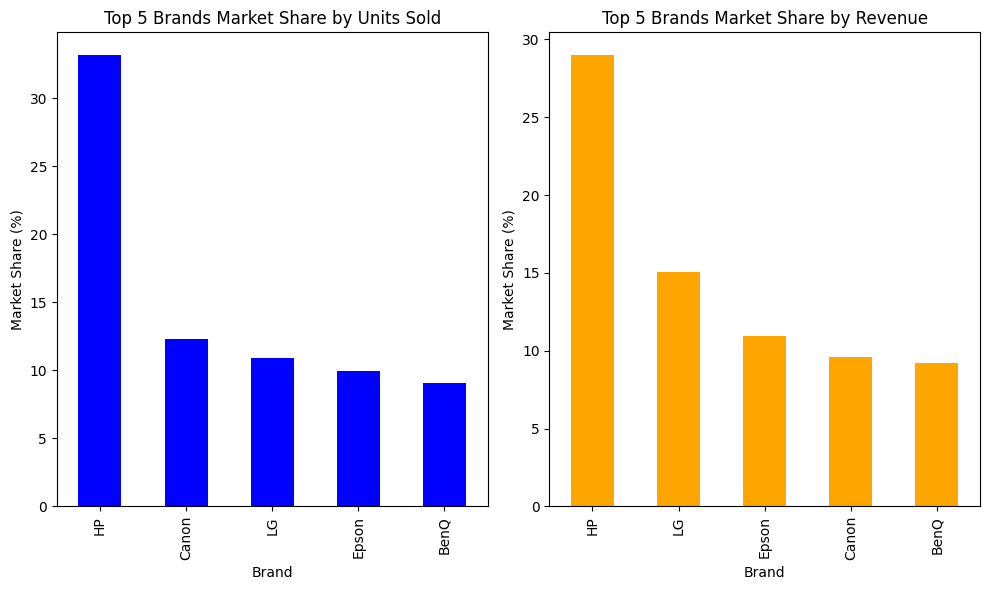

In [28]:
# Calculate total units sold and total revenue for each brand
brand_sold = data.groupby('Brand')['Units Sold'].sum()
brand_revenue = data.groupby('Brand')['Revenue'].sum()

total_sold = brand_sold.sum()
total_revenue = brand_revenue.sum()

brand_market_share_units = (brand_sold / total_sold) * 100
brand_market_share_revenue = (brand_revenue / total_revenue) * 100

# Sort the brands based on market share
sorted_brands_units = brand_market_share_units.sort_values(ascending=False)
sorted_brands_revenue = brand_market_share_revenue.sort_values(ascending=False)

top_5_brands_units = sorted_brands_units.head(5)
top_5_brands_revenue = sorted_brands_revenue.head(5)

# Step 5: Plot the graph
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
top_5_brands_units.plot(kind='bar', color='Blue')
plt.title('Top 5 Brands Market Share by Units Sold')
plt.xlabel('Brand')
plt.ylabel('Market Share (%)')

plt.subplot(1, 2, 2)
top_5_brands_revenue.plot(kind='bar', color='Orange')
plt.title('Top 5 Brands Market Share by Revenue')
plt.xlabel('Brand')
plt.ylabel('Market Share (%)')

plt.tight_layout()
plt.show()


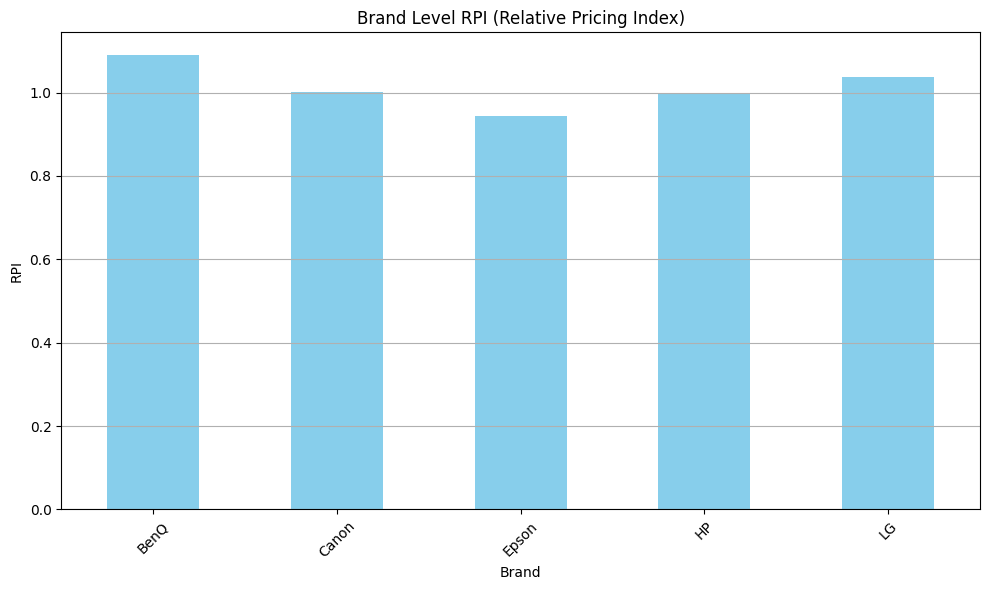

In [33]:


# Filter the DataFrame for the specified brands
brands_of_interest = ['HP', 'LG', 'BenQ', 'Epson', 'Canon']
filtered_data = data[data['Brand'].isin(brands_of_interest)]

# Calculate the average price for each brand
brand_avg_price = filtered_data.groupby('Brand')['Price'].mean()

# Calculate the average price for all brands
overall_avg_price = filtered_data['Price'].mean()

# Calculate RPI for each brand
brand_rpi = brand_avg_price / overall_avg_price

# Plot the graph
plt.figure(figsize=(10, 6))
brand_rpi.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Brand Level RPI (Relative Pricing Index)')
plt.xlabel('Brand')
plt.ylabel('RPI')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [39]:
data['Brand'].nunique()

26

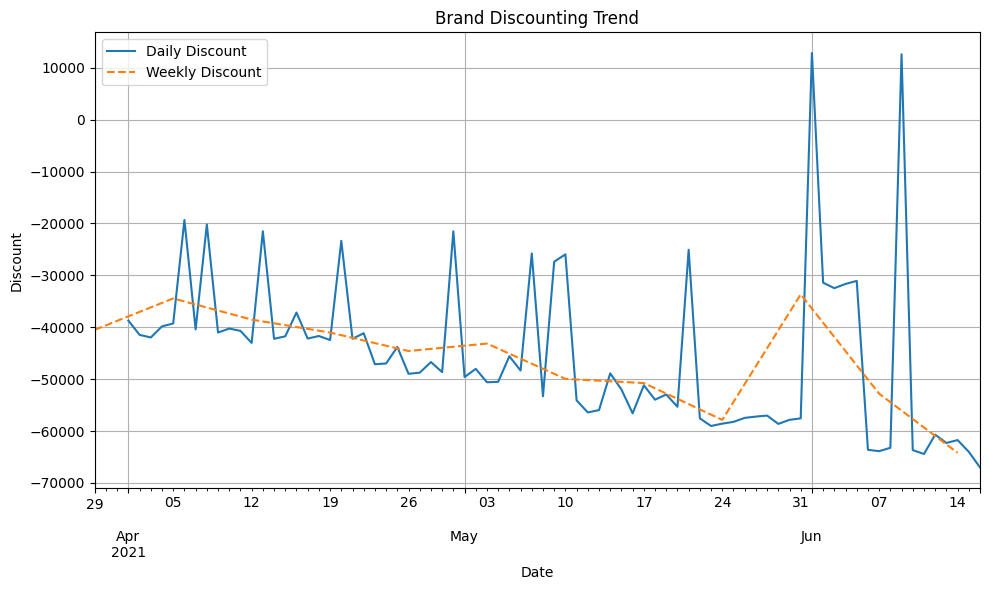

In [ ]:
#Brand Discounting trend
#maybe can do for top 5

dff = data
# Set 'Date' column as index
dff.set_index('Date', inplace=True)

# Resample daily and calculate daily average discount
daily_discount = dff['Discount'].resample('D').mean()

# Resample weekly and calculate weekly average discount
weekly_discount = dff['Discount'].resample('W').mean()

# Plot the graph
plt.figure(figsize=(10, 6))
daily_discount.plot(label='Daily Discount')
weekly_discount.plot(label='Weekly Discount', linestyle='--')
plt.title('Brand Discounting Trend')
plt.xlabel('Date')
plt.ylabel('Discount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#Market Leader in each category
#Brand Market Share ----Both on the basis of units sold and revenue (Price*Units sold)
#Brand level RPI (Relative Pricing Index)
#Brand Discounting trend
#Brand Average Price Trend
#Category growth 
#Top products in each category
